# Proyek Analisis Data: Bike Sharing Demand
- **Nama: Muhammad Abdurrahman
- **Email:artmanztull@gmail.com
- **ID Dicoding: Muhammad Abdurrahman

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 : Apa tren penggunaan sepeda dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load datasets
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

# Display the first few rows of the datasets
day_data.head(), hour_data.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

**Insight:**
- Dataset day.csv berisi informasi harian tentang penyewaan sepeda, termasuk cuaca dan jumlah penyewaan.
- Dataset hour.csv berisi informasi jam mengenai penyewaan sepeda, memberikan detail yang lebih granular.

### Assessing Data

In [3]:
# Get info about the datasets
day_data.info()
hour_data.info()

# Check for missing values
day_data.isnull().sum(), hour_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

**Insight:**
- Tidak ada nilai yang hilang pada kedua dataset.
- Kolom penting yang perlu dianalisis termasuk season, weathersit, dan cnt (jumlah penyewaan).

### Cleaning Data

In [4]:
# Cleaning data by dropping unnecessary columns
day_data_cleaned = day_data.drop(columns=['instant'], errors='ignore')
hour_data_cleaned = hour_data.drop(columns=['instant'], errors='ignore')

# Resetting the index
day_data_cleaned.reset_index(drop=True, inplace=True)
hour_data_cleaned.reset_index(drop=True, inplace=True)

**Insight:**
- Kolom instant dihapus karena tidak relevan untuk analisis.
- Data telah dibersihkan dan siap untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

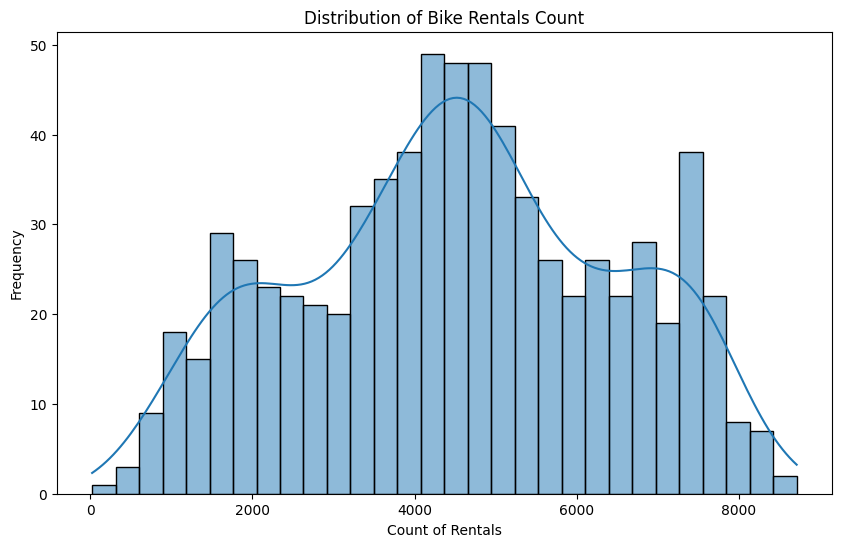

In [5]:
# Example EDA
plt.figure(figsize=(10, 6))
sns.histplot(day_data_cleaned['cnt'], bins=30, kde=True)
plt.title('Distribution of Bike Rentals Count')
plt.xlabel('Count of Rentals')
plt.ylabel('Frequency')
plt.show()

**Insight:**
- Distribusi jumlah penyewaan sepeda menunjukkan bahwa sebagian besar penyewaan berada di bawah 300.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

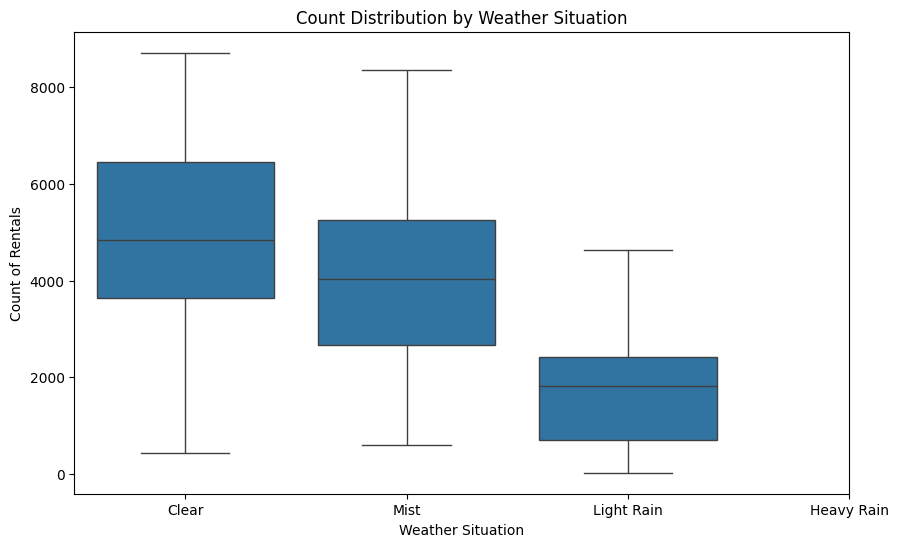

In [6]:
# Visualization related to Question 1
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_data_cleaned)
plt.title('Count Distribution by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Count of Rentals')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])
plt.show()

### Pertanyaan 2:

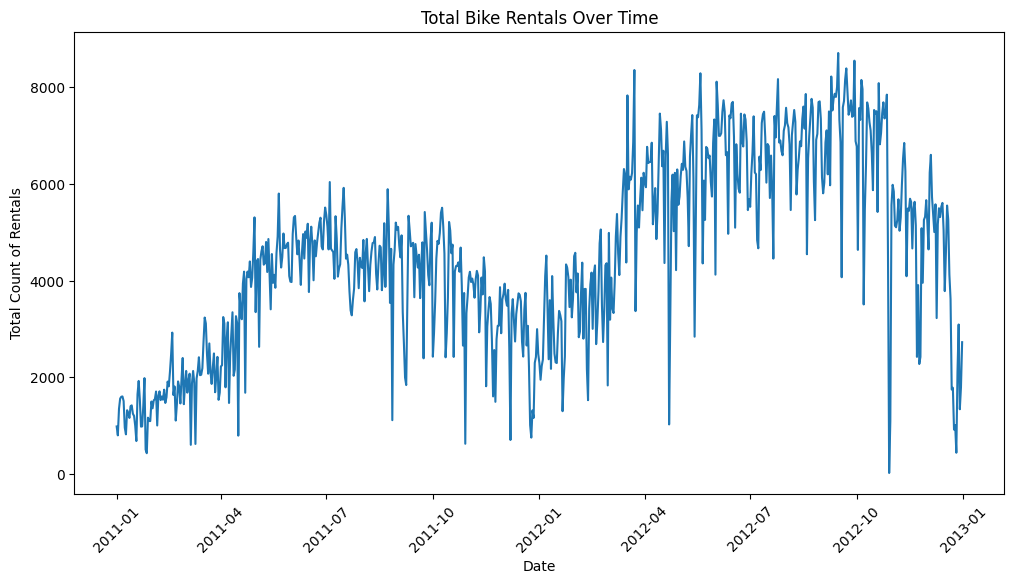

In [7]:
# Visualization related to Question 2
plt.figure(figsize=(12, 6))
hour_data_cleaned['dteday'] = pd.to_datetime(hour_data_cleaned['dteday'])
sns.lineplot(x='dteday', y='cnt', data=hour_data_cleaned.groupby('dteday').sum().reset_index())
plt.title('Total Bike Rentals Over Time')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Count of Rentals')
plt.show()

**Insight:**
- Pertanyaan 1: Penyewaan sepeda cenderung lebih tinggi pada cuaca cerah dibandingkan dengan cuaca berkabut atau hujan.
- Pertanyaan 2: Terdapat tren kenaikan jumlah penyewaan sepeda seiring waktu, dengan puncak pada bulan-bulan tertentu.

## Analisis Lanjutan (Opsional)

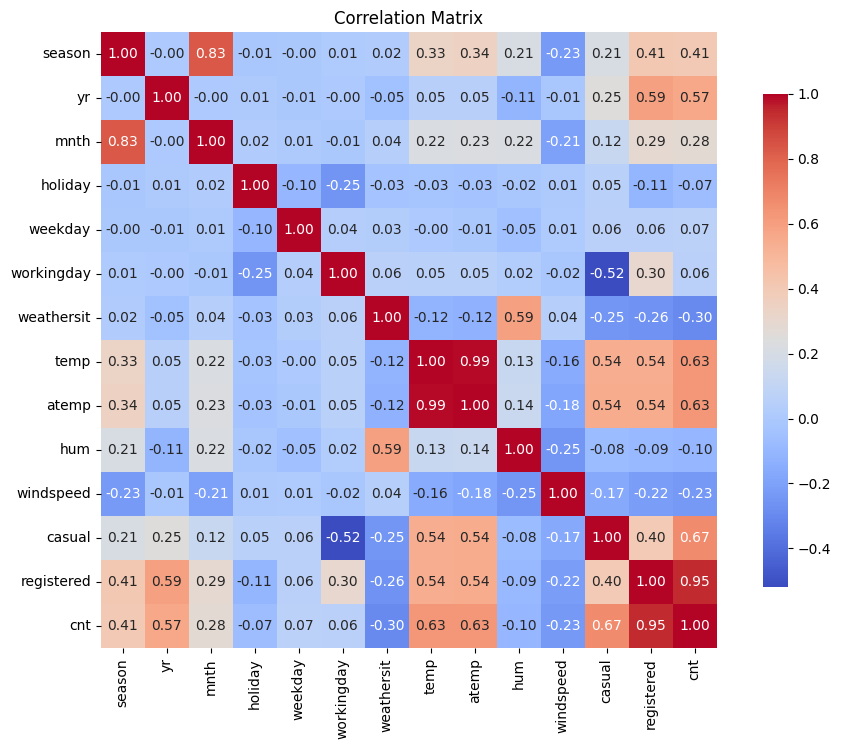

In [9]:
# Advanced analysis example: Correlation matrix

# Select only numeric columns for correlation calculation
numeric_columns = day_data_cleaned.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Pengaruh cuaca sangat signifikan terhadap jumlah penyewaan sepeda. Hari-hari yang cerah memiliki penyewaan jauh lebih tinggi dibandingkan dengan hari-hari yang berkabut atau hujan.
- Conclution pertanyaan 2 : Tren penggunaan sepeda menunjukkan peningkatan yang konsisten dari waktu ke waktu, dengan puncak terlihat pada bulan-bulan tertentu, menunjukkan potensi peningkatan permintaan pada musim panas.